# Lab Segmentation 1

In [83]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


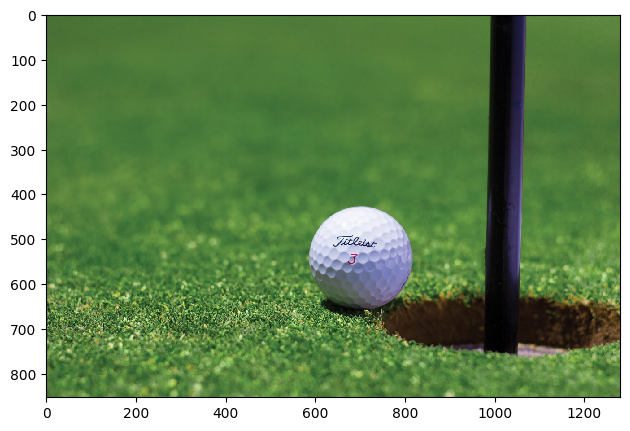

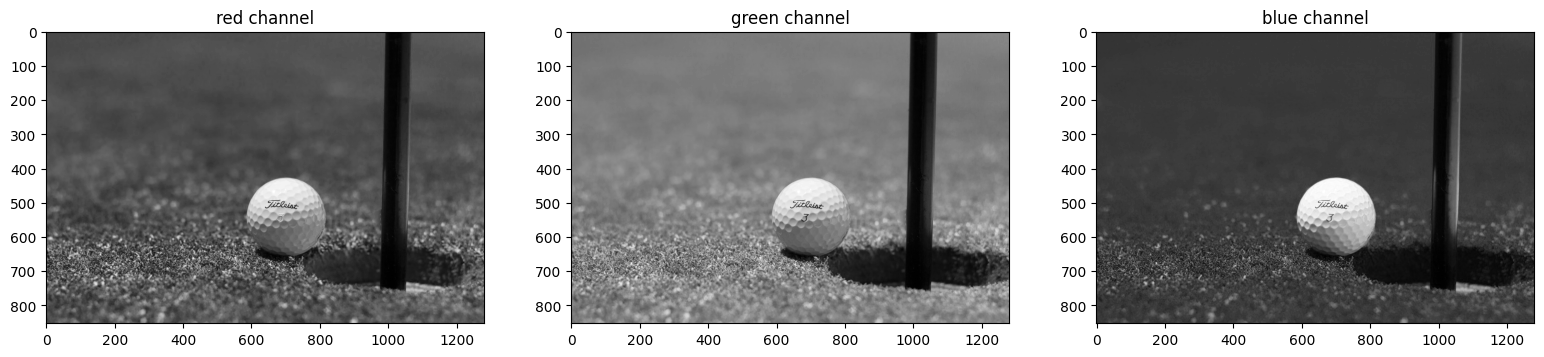

In [84]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 

# read image golf
golf_image = io.imread('./imgs/exp1/golf.jpeg')
io.imshow(golf_image)

golf_image = golf_image.astype(float)
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
red_channel, green_channel, blue_channel = golf_image[:,:,0], golf_image[:,:,1], golf_image[:,:,2]

show_images([red_channel, green_channel, blue_channel],
            titles=['red channel', 'green channel', 'blue channel'])

### Green is the dominating color

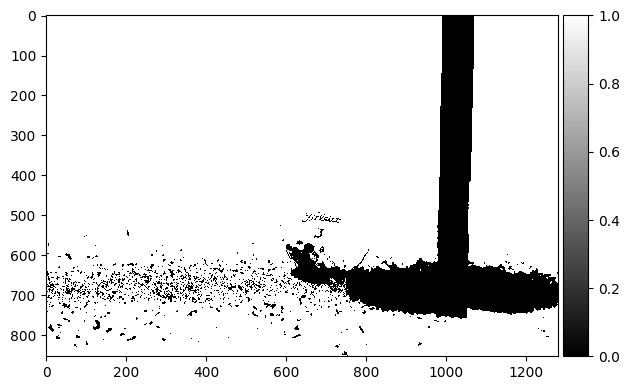

In [85]:
# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)

green_channel_binary = (green_channel > 100).astype(int)
green_channel_binary
io.imshow(green_channel_binary, cmap='gray')

### 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels have larger values than the other channels with an appropriate threshold


In [86]:
# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
threshold = 10

def get_mask(image, threshold):
    avg_red = np.mean(image[:,:,0])
    avg_green = np.mean(image[:,:,1])
    avg_blue = np.mean(image[:,:,2])
    print(avg_red, avg_green, avg_blue)
    
    max_avg = max(avg_red, avg_green, avg_blue)
    max_channel = None
    ch1, ch2 = None, None
    if (max_avg == avg_red):
        print('red is dominant')
        max_channel = 0
        ch1, ch2 = 1, 2
    elif (max_avg == avg_green):
        print('green is dominant')
        max_channel = 1
        ch1, ch2 = 0, 2
    else:
        print('blue is dominant')
        max_channel = 2
        ch1, ch2 = 0, 1
        
    return (image[:,:,max_channel] > image[:,:,ch1] + threshold) & (image[:,:,max_channel] > image[:,:,ch2] + threshold)


> ### Assuming that I know that the dominating channel is green

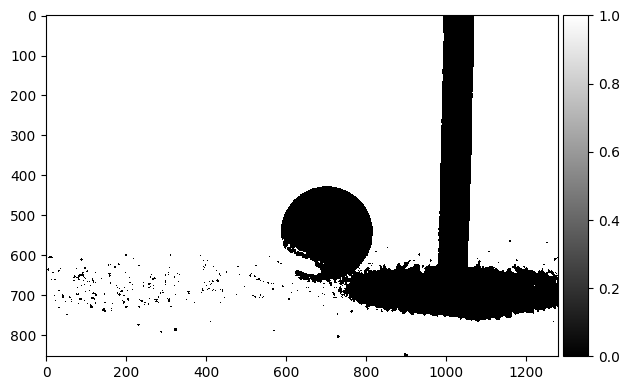

In [87]:
mask = (green_channel > red_channel + threshold) & (green_channel > blue_channel + threshold)

binary_result = mask.astype(int)
io.imshow(binary_result, cmap='gray')


> ### using the get_mask function without speculation

81.7294054073857 120.21558561694022 61.97284492233294
green is dominant


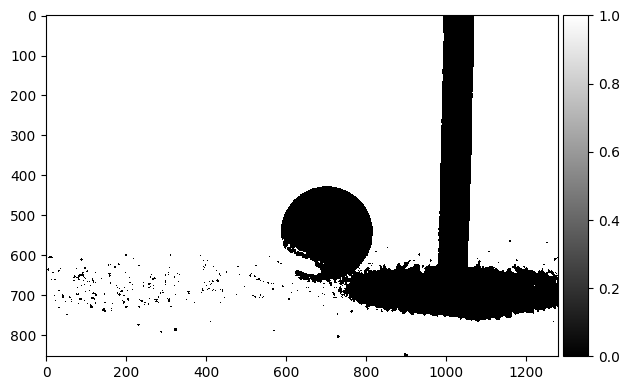

In [88]:
mask = get_mask(golf_image, threshold)
second_binary_result = mask.astype(int)
io.imshow(second_binary_result, cmap='gray')

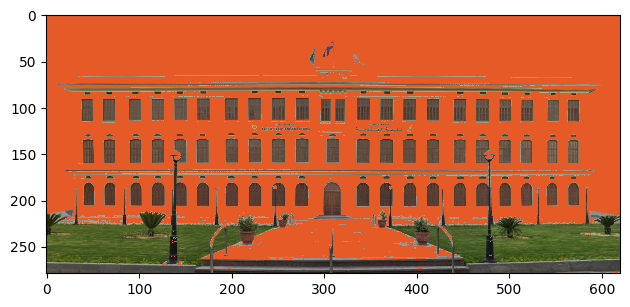

In [106]:
# 1- Get the required RGB color (Using a color picker)
required_color = np.array([0, 255, 0], dtype=float)

# 2- Read image
image = io.imread('./imgs/exp2/cufe.png').astype(float)

# 3- extract R, G and B channels (as float)
red_channel, green_channel, blue_channel = image[:,:,0], image[:,:,1], image[:,:,2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
diff_red = np.abs(red_channel - required_color[0])
diff_green = np.abs(green_channel - required_color[1])
diff_blue = np.abs(blue_channel - required_color[2])

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
distance = np.sqrt(diff_red**2 + diff_green**2 + diff_blue**2)

# 6- create a mask by thresholding the differences
threshold = 240

mask = distance > threshold

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
image[mask] = [230, 90, 40]

# 8- show the image or save it
io.imshow(image.astype(np.uint8))
